# Data Extraction and Preparation


Instrucciones previas:

En este Notebook se explica el proceso completo para crear un dataset con los datos que necesitamos para hacer el análisis posterior. El proceso va a ser así:
1. Extraer los datos del top200 diario para el PERIODO PANDEMIA y luego extraer los datos para el PERIODO NORMAL de los años 2017, 2018, 2019 y 2020. No se han cogido años anteriores porque el top200 no deja extrar información de antes de 2017.
2. Añadir al listado anterior determinadas FEATURES de cada canción usando la API de Spotify.
3. Añadir al listado anterior el género de cada canción que tenemos que extraerlo de una forma diferente en la API de Spotify
4. Exportamos un dataset general que nos servirá para luego hacer los análisis.

IMPORTANTE: Se puede ejecutar todo, pero hay ciertos scripts que está en triples comillas porque solo es necesario ejecutarlo una vez (o que para obtener datos de  los dos periodos se utiliza una variante por fechas del mismo). Algunos scripts de Extracción de canciones tardan su tiempo, por eso en al carpeta raiz he dejado ya los CSV resultantes y un aviso en la celda para tenerlo en cuenta si se quiere ejecutar.

**Todas las celdas que tardan en ejecutarse más tiempo están marcada con el tiempo de ejecución previamente**


# Extracción de canciones en top200

In [4]:
# INSTALAR PREVIAMENTE PARA EJECUTAR TODOS LOS NOTEBOOKS:
# !pip install fycharts
# !pip install spotipy
# !pip install altair vega_datasets
# !pip install seaborn

He decidido seleccionar un periodo amplio para extraer todos los datos del top200, y más adelante seleccionado periodos concretos que me interesan, como el periodo pandemia o el periodo normal.

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import altair as alt

# Configuración visual
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Region seleccionada para extraer los datos:
region_select = ["es"]

# Datetimes de año 2017
fecha_inicial_2017= datetime(2017, 1, 1)
fecha_fin_2017 = datetime(2017, 5, 20)
out_file_db_2017 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2017.year)
out_file_csv_2017 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2017.year)

# Datetimes de año 2018
fecha_inicial_2018= datetime(2018, 1, 1)
fecha_fin_2018 = datetime(2018, 5, 20)
out_file_db_2018 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2018.year)
out_file_csv_2018 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2018.year)

# Datetimes de año 2019
fecha_inicial_2019= datetime(2019, 1, 1)
fecha_fin_2019 = datetime(2019, 5, 20)
out_file_db_2019 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2019.year)
out_file_csv_2019 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2019.year)

# Datetimes de año 2020
fecha_inicial_2020= datetime(2020, 1, 1)
fecha_fin_2020 = datetime(2020, 5, 19)
out_file_db_2020 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2020.year)
out_file_csv_2020 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2020.year)

print('Días totales seleccionados 2020:', fecha_fin_2020 - fecha_inicial_2020)
print('Días totales seleccionados 2019:', fecha_fin_2019 - fecha_inicial_2019)
print('Días totales seleccionados 2018:', fecha_fin_2018 - fecha_inicial_2018)
print('Días totales seleccionados 2017:', fecha_fin_2017 - fecha_inicial_2017)

Días totales seleccionados 2020: 139 days, 0:00:00
Días totales seleccionados 2019: 139 days, 0:00:00
Días totales seleccionados 2018: 139 days, 0:00:00
Días totales seleccionados 2017: 139 days, 0:00:00


Creamos una función para extracción de canciones del top200 de todos los años y la extracción de los datos. No hace falta ejecutarlo porque tarda su tiempo. El resultado de este script son 4 datasets, uno por año, con las canciones y en columnas ciertas features básicas.

Usaremos un paquete que te llama <a href="https://pypi.org/project/fycharts/" target="_blank">fycharts</a> que nos facilita la extracción de estos datos.



In [6]:
# Función para 
def extraction_tracks(fecha_inicial, fecha_final, region_select, out_file_db, out_file_csv):
    from fycharts.SpotifyCharts import SpotifyCharts
    import sqlalchemy
    
    api = SpotifyCharts()
    connector = sqlalchemy.create_engine(out_file_db, echo=False)
    api.top200Daily(output_file = out_file_csv, output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial, end = fecha_final, region = region_select)

# Extracción de canciones
# SOLO EJECUTAR UNA VEZ INICIAL, NO HACE FALTA VOLVER A EJECUTARLO Y SE GUARDAN LOS DATOS EN CSV EN LA RAÍZ, TARDA 7-10 MINUTOS.

'''
Time1 = datetime.now()

extraction_tracks(fecha_inicial_2017.strftime('%Y-%m-%d'), fecha_fin_2017.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2017, out_file_csv_2017)
extraction_tracks(fecha_inicial_2018.strftime('%Y-%m-%d'), fecha_fin_2018.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2018, out_file_csv_2018)
extraction_tracks(fecha_inicial_2019.strftime('%Y-%m-%d'), fecha_fin_2019.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2019, out_file_csv_2019)
extraction_tracks(fecha_inicial_2020.strftime('%Y-%m-%d'), fecha_fin_2020.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2020, out_file_csv_2020)
                  
Time2 = datetime.now()

print("Tiempo ejecución:", Time2 -Time1)
'''


'\nTime1 = datetime.now()\n\nextraction_tracks(fecha_inicial_2017.strftime(\'%Y-%m-%d\'), fecha_fin_2017.strftime(\'%Y-%m-%d\'),\n                  region_select, out_file_db_2017, out_file_csv_2017)\nextraction_tracks(fecha_inicial_2018.strftime(\'%Y-%m-%d\'), fecha_fin_2018.strftime(\'%Y-%m-%d\'),\n                  region_select, out_file_db_2018, out_file_csv_2018)\nextraction_tracks(fecha_inicial_2019.strftime(\'%Y-%m-%d\'), fecha_fin_2019.strftime(\'%Y-%m-%d\'),\n                  region_select, out_file_db_2019, out_file_csv_2019)\nextraction_tracks(fecha_inicial_2020.strftime(\'%Y-%m-%d\'), fecha_fin_2020.strftime(\'%Y-%m-%d\'),\n                  region_select, out_file_db_2020, out_file_csv_2020)\n                  \nTime2 = datetime.now()\n\nprint("Tiempo ejecución:", Time2 -Time1)\n'

## Importamos los resultados extraídos

Primer vistazo y comprobaciones. Las columnas son:
- **Position:** Posición en el Top200 en dicho día (no nos interesa)
- **Track name:** Nombre de canción
- **Artist:** Artista
- **Streams:** Reproducciones que ha tenido ese día dicha canción. ESTE NOS INTERESA MUCHO
- **date:** Fecha del top200
- **region:** país del Top200
- **Spotify_id:** Identificación única de la canción


In [7]:
# Importamos la tabla con los datos y miramos a ver qué tal están
data_top200_2017= pd.read_csv("top_200_daily_CSV_2017.csv")
data_top200_2018= pd.read_csv("top_200_daily_CSV_2018.csv")
data_top200_2019= pd.read_csv("top_200_daily_CSV_2019.csv")
data_top200_2020= pd.read_csv("top_200_daily_CSV_2020.csv")

# Revisar si hay valores nulos y tamaños de bases de datos, que deberían ser exactas en tamaño
print(data_top200_2020.isnull().sum())
print('2020:', data_top200_2020.shape)
print('2019:',data_top200_2019.shape)
print('2018:',data_top200_2018.shape)
print('2017:',data_top200_2017.shape)
data_top200_2017.head()

Position      0
Track Name    0
Artist        0
Streams       0
date          0
region        0
spotify_id    0
dtype: int64
2020: (28000, 7)
2019: (28000, 7)
2018: (28000, 7)
2017: (28000, 7)


,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,Chantaje (feat. Maluma),Shakira,189721,2017-01-01,es,6mICuAdrwEjh6Y6lroV2Kg
1,2,Reggaetón Lento (Bailemos),CNCO,165291,2017-01-01,es,3AEZUABDXNtecAOSC1qTfo
2,3,Safari,J Balvin,141575,2017-01-01,es,6rQSrBHf7HlZjtcMZ4S4bO
3,4,Vente Pa' Ca (feat. Maluma),Ricky Martin,119865,2017-01-01,es,7DM4BPaS7uofFul3ywMe46
4,5,La Bicicleta,Carlos Vives,119181,2017-01-01,es,0sXvAOmXgjR2QUqLK1MltU


Una vez echado un vistazo, importamos los datos que queremos y preparamos los datos para hacer el análisis de dos periodos que nos interesan:

- **PERIODO 1: PANDEMIA**, desde que se decreta el estado de alarma hasta dos meses después, cuando, aunque todavía se está en estado de alarma, se empiezan a quitar restricciones de estar en casa y se puede empezar a salir: (2020, 3, 13) -> (2020, 5, 12)
- **PERIODO 2: NORMAL (PERIODO DE CONTROL)** , manteniéndonos en el 2020 cogemos un periodo anterior con un tamaño similar en días: (2020, 1, 8) -> (2020, 3, 8)

La idea es más adelante poder compararlos a ver si la tendencia es diferente o no, y así comprobar si de verdad ha habido un cambio relevante durante la pandemia. 

Por comodidad y rapidez, he ejecutado todo el Notebook desde aquí cambiando las fechas del periodo y al exportar a CSV hacerlo con nombres diferentes para quedarnos con los datos por separado de ambos periodos. En entrecomillado triple se verá el código que es cambiado al principio para las fechas y al final para la exportación a CSV. **Si ejecutáis veréis los datos del Periodo Pandemia**

Datasets en raíz exportados:
- data_global_coronaperiod.csv
- data_global_normalperiod.csv


In [8]:
# Importamos con las columnas que nos interesan
data_top200_2020 = pd.read_csv("top_200_daily_CSV_2020.csv", parse_dates= ["date"],
                               usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2019 = pd.read_csv("top_200_daily_CSV_2019.csv", parse_dates= ["date"],
                               usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2018 = pd.read_csv("top_200_daily_CSV_2018.csv", parse_dates= ["date"],
                               usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2017 = pd.read_csv("top_200_daily_CSV_2017.csv", parse_dates= ["date"],
                               usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])

#Meto el año en nueva columnas que nos servirá más adelante.
data_top200_2020['year'] = pd.DatetimeIndex(data_top200_2020['date']).year
data_top200_2019['year'] = pd.DatetimeIndex(data_top200_2019['date']).year
data_top200_2018['year'] = pd.DatetimeIndex(data_top200_2018['date']).year
data_top200_2017['year'] = pd.DatetimeIndex(data_top200_2017['date']).year

# Para dividir por periodos de estudio, establecemos fechas
fecha_inicial_coronaperiod = datetime(2020, 3, 13)
fecha_final_coronaperiod = datetime(2020, 5, 12)
fecha_inicial_normalperiod = datetime(2020, 1, 8)
fecha_final_normalperiod = datetime(2020, 3, 9)

##### Fechas para extracción de PANDEMIA PERIOD

# 2020 para PANDEMIA PERIOD
fecha_inicial_2020 = fecha_inicial_coronaperiod
fecha_final_2020 = fecha_final_coronaperiod
print('Días totales seleccionados 2020:', fecha_final_2020 - fecha_inicial_2020)
data_top200_2020 = data_top200_2020[data_top200_2020.date.between(fecha_inicial_2020, fecha_final_2020)]

# 2019 para PANDEMIA PERIOD
fecha_inicial_2019 = fecha_inicial_coronaperiod.replace(fecha_inicial_coronaperiod.year -1)
fecha_final_2019 = fecha_final_coronaperiod.replace(fecha_inicial_coronaperiod.year -1)
print('Días totales seleccionados 2019:', fecha_final_2019 - fecha_inicial_2019)
data_top200_2019 = data_top200_2019[data_top200_2019.date.between(fecha_inicial_2019, fecha_final_2019)]

# 2018 para PANDEMIA PERIOD
fecha_inicial_2018 = fecha_inicial_coronaperiod.replace(fecha_inicial_coronaperiod.year -2)
fecha_final_2018 = fecha_final_coronaperiod.replace(fecha_final_coronaperiod.year -2)
print('Días totales seleccionados 2018:', fecha_final_2018 - fecha_inicial_2018)
data_top200_2018 = data_top200_2018[data_top200_2018.date.between(fecha_inicial_2018, fecha_final_2018)]

# 2017  para PANDEMIA PERIOD
fecha_inicial_2017 = fecha_inicial_coronaperiod.replace(fecha_inicial_coronaperiod.year -3)
fecha_final_2017 = fecha_final_coronaperiod.replace(fecha_final_coronaperiod.year -3)
print('Días totales seleccionados 2017:', fecha_final_2017 - fecha_inicial_2017)
data_top200_2017 = data_top200_2017[data_top200_2017.date.between(fecha_inicial_2017, fecha_final_2017)]

##### Fechas para extracción de NORMAL PERIOD, SÓLO USAR EN EXPORTACIÓN INICIAL

'''# 2020 para NORMAL PERIOD
fecha_inicial_2020 = fecha_inicial_normalperiod
fecha_final_2020= fecha_final_normalperiod
print('Días totales seleccionados 2020:', fecha_final_2020 - fecha_inicial_2020)
data_top200_2020 = data_top200_2020[data_top200_2020.date.between(fecha_inicial_2020, fecha_final_2020)]

# 2019 para NORMAL PERIOD
fecha_inicial_2019 = fecha_inicial_normalperiod.replace(fecha_inicial_normalperiod.year -1)
fecha_final_2019 = fecha_final_normalperiod.replace(fecha_final_normalperiod.year -1)
print('Días totales seleccionados 2019:', fecha_final_2019 - fecha_inicial_2019)
data_top200_2019 = data_top200_2019[data_top200_2019.date.between(fecha_inicial_2019, fecha_final_2019)]

# 2018 para NORMAL PERIOD
fecha_inicial_2018 = fecha_inicial_normalperiod.replace(fecha_inicial_normalperiod.year -2)
fecha_final_2018 = fecha_final_normalperiod.replace(fecha_final_normalperiod.year -2)
print('Días totales seleccionados 2018:', fecha_final_2018 - fecha_inicial_2018)
data_top200_2018= data_top200_2018[data_top200_2018.date.between(fecha_inicial_2018, fecha_final_2018)]

# 2017 para NORMAL PERIOD
fecha_inicial_2017 = fecha_inicial_normalperiod.replace(fecha_inicial_normalperiod.year -3)
fecha_final_2017 = fecha_final_normalperiod.replace(fecha_final_normalperiod.year -3)
print('Días totales seleccionados 2017:', fecha_final_2017 - fecha_inicial_2017)
data_top200_2017= data_top200_2017[data_top200_2017.date.between(fecha_inicial_2017, fecha_final_2017)]'''

# Concateno los datos de todos los años
data_top200 = pd.concat([data_top200_2020, data_top200_2019,
                                      data_top200_2018, data_top200_2017], axis=0,)

Días totales seleccionados 2020: 60 days, 0:00:00
Días totales seleccionados 2019: 60 days, 0:00:00
Días totales seleccionados 2018: 60 days, 0:00:00
Días totales seleccionados 2017: 60 days, 0:00:00


Hacemos algunas comprobaciones básicas, pero ojo! No hay mismo número de Track Names e spotify_ID, porque una canción con el mismo nombre puede estar en diferentes albunes y entonces le asignan una spotify_ID diferente, por eso hay más spotify_IDs que Track Names. Por ejemplo puede pasar fácilmente en recopilatorios.

In [9]:
# Revisión
print(data_top200.shape)
print(data_top200.dtypes)
print(data_top200.nunique())
print(data_top200.groupby(['year']).sum())
data_top200.groupby(['year']).count()

(48800, 7)
Position               int64
Track Name            object
Artist                object
Streams                int64
date          datetime64[ns]
spotify_id            object
year                   int64
dtype: object
Position        200
Track Name     1453
Artist          468
Streams       37704
date            244
spotify_id     1617
year              4
dtype: int64
      Position    Streams
year                     
2017   1226100  595957911
2018   1226100  699945633
2019   1226100  921683011
2020   1226100  989830710


,Position,Track Name,Artist,Streams,date,spotify_id
year,,,,,,
2017,12200,12200,12200,12200,12200,12200
2018,12200,12200,12200,12200,12200,12200
2019,12200,12200,12200,12200,12200,12200
2020,12200,12200,12200,12200,12200,12200


In [10]:
# Vemos una muestra con un Spotify_ID
data_top200.loc[data_top200['spotify_id'] == '6NfrH0ANGmgBXyxgV2PeXt']

,Position,Track Name,Artist,Streams,date,spotify_id,year
14401,2,La Difícil,Bad Bunny,406642,2020-03-13,6NfrH0ANGmgBXyxgV2PeXt,2020
14601,2,La Difícil,Bad Bunny,399788,2020-03-14,6NfrH0ANGmgBXyxgV2PeXt,2020
14801,2,La Difícil,Bad Bunny,372705,2020-03-15,6NfrH0ANGmgBXyxgV2PeXt,2020
15001,2,La Difícil,Bad Bunny,389384,2020-03-16,6NfrH0ANGmgBXyxgV2PeXt,2020
15201,2,La Difícil,Bad Bunny,390067,2020-03-17,6NfrH0ANGmgBXyxgV2PeXt,2020
...,...,...,...,...,...,...,...
25617,18,La Difícil,Bad Bunny,172109,2020-05-08,6NfrH0ANGmgBXyxgV2PeXt,2020
25817,18,La Difícil,Bad Bunny,165292,2020-05-09,6NfrH0ANGmgBXyxgV2PeXt,2020
26026,27,La Difícil,Bad Bunny,151313,2020-05-10,6NfrH0ANGmgBXyxgV2PeXt,2020
26228,29,La Difícil,Bad Bunny,166240,2020-05-11,6NfrH0ANGmgBXyxgV2PeXt,2020


## Calcular Streamstotales de canción en el periodo y exploración

Por otro lado nos interesan más los Streams totales de cada canción en todo el periodo por año, más que los de cada Top200, entonces los vamos a sumar y añadir en una nueva columna. Después hacemos un merge para juntar el dataframe inicial con el nuevo con los StreamsTotal y vemos cómo queda.

In [11]:
# Agrupar sumas y convertir en Dataframe
data_top200_sumastreams = data_top200.groupby('spotify_id')['Streams'].sum()
data_top200_sumastreams = pd.DataFrame({'spotify_id':data_top200_sumastreams.index, 'Streams':data_top200_sumastreams.values})
print(data_top200_sumastreams.shape)

# Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged = pd.merge(data_top200, data_top200_sumastreams, on=['spotify_id'], how='inner')

data_top200_merged.rename(columns = {'Streams_x':'Streams', 'Streams_y':'Streamstotal'},  inplace = True)
print(data_top200_merged.shape)
data_top200_merged

# Comprobaciones
# data_top200_sumastreams[data_top200_sumastreams['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']
# data_top200[data_top200['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']

(1617, 2)
(48800, 8)


,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal
0,1,Tusa,KAROL G,432730,2020-03-13,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982
1,1,Tusa,KAROL G,446086,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982
2,1,Tusa,KAROL G,438199,2020-03-15,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982
3,1,Tusa,KAROL G,474411,2020-03-16,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982
4,1,Tusa,KAROL G,495344,2020-03-17,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982
...,...,...,...,...,...,...,...,...
48795,142,Meet Me in the Hallway,Harry Styles,22944,2017-05-12,4u9Y4Z9i9VaAbBK7rW1Rha,2017,22944
48796,144,Rollin (feat. Future & Khalid),Calvin Harris,22740,2017-05-12,3FDrI0FLKzrYQiWxPhqV2W,2017,22740
48797,168,Two Ghosts,Harry Styles,20459,2017-05-12,4B1rpPmQXwj78wk6aIGwwU,2017,20459
48798,174,Kiwi,Harry Styles,19619,2017-05-12,33SNO8AaciGbNaQFkxvPrW,2017,19619


Echamos un vistazo al dataframe para ver cuantas canciones totales hay y meter en formato lista todas las canciones. También cogemos una muestra para analizar solo con algunos datos inicialmente. Más adelante se ve para que hacemos esto.


In [12]:
#Sacar lista de CANCIONES TOTALES (con repetición) para luego sacar las Features
list_ids = data_top200_merged['spotify_id'].tolist()
print('id de ejemplo', list_ids[0])
print('Canciones totales:', len(list_ids))

# Quitar duplicados, QUEDARNOS CON CANCIONES ÚNICAS
list_ids = list(set(list_ids))
print('Canciones totales únicas:' ,len(list_ids))

# Lista final a extraer
test_list = list_ids[0:3000] #asigno 3000 para que sea mayor que las canciones únicas
len(test_list)


id de ejemplo 7k4t7uLgtOxPwTpFmtJNTY
Canciones totales: 48800
Canciones totales únicas: 1617


1617

Echamos un vistazo al dataframe para ver cuantos artistas totales hay y meter en formato lista todos los artistas. También cogemos una muestra para analizar solo con algunos datos inicialmente.



In [13]:
#Sacar lista de ARTISTAS TOTALES
list_artist = data_top200_merged['Artist'].tolist()
print('nombre de ejemplo:', list_artist[0])
print('Artistas totales:', len(list_artist))

# Quitar duplicados, QUEDARNOS CON ARTISTAS ÚNICOS
list_artist = list(set(list_artist))
print('Artistas totales únicos:' ,len(list_artist))

# Lista final a extraer
test_list_artist = list_artist[0:1000] # Asigno 1000 para que sea mayor que los artitas únicos
len(test_list_artist)


nombre de ejemplo: KAROL G
Artistas totales: 48800
Artistas totales únicos: 468


468

# Extracción de datos de las canciones desde API SPOTIFY



Ahora vamos a extraer las features de cada canción que nos van a dar algunos valores interesantes como, por ejemplo, en qué escala del 0 al 1 es una canción más o menos "bailable". Más adelante entraremos en profundidad en los significados de los features.

Para ello utilizaremos <a href="https://spotipy.readthedocs.io/en/2.16.0/" target="_blank">Spotipy</a>, que es un paquete de python que facilita la extracción de información de la API de Spotify.



Los features que nos interesan son los siguientes:
- 'length'
- 'popularity'
- 'acousticness'
- 'danceability'
- 'energy'
- 'instrumentalness'
- 'liveness'
- 'loudness'
- 'speechiness'
- 'valence'
- 'tempo'

In [14]:
#Preparación de Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

# IMPORTANTE INTRODUCIR OTRAS CREDENCIALES, LAS USADAS ESTÁN CAMBIADAS.
passw = pd.read_csv("pass_spotify.txt", sep = ',', encoding="utf-8")
client_id = passw.columns[0]
client_secret = passw.columns[1]

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [15]:
#Hacemos una prueba para ver las features que hay de una canción concreta por su ID
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])

[{'danceability': 0.669,
  'energy': 0.829,
  'key': 1,
  'loudness': -3.801,
  'mode': 1,
  'speechiness': 0.49,
  'acousticness': 0.179,
  'instrumentalness': 0,
  'liveness': 0.241,
  'valence': 0.61,
  'tempo': 118.934,
  'type': 'audio_features',
  'id': '2eOuL8KesslTLQERQPu11D',
  'uri': 'spotify:track:2eOuL8KesslTLQERQPu11D',
  'track_href': 'https://api.spotify.com/v1/tracks/2eOuL8KesslTLQERQPu11D',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2eOuL8KesslTLQERQPu11D',
  'duration_ms': 253067,
  'time_signature': 4}]

Con documentación de otros proyectos he adaptado una función para sacar las features desde una spotify_id

In [17]:
# Función para sacar las features de canciones que me interesan desde la id
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  valence = features[0]['valence']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  id = features[0]['id']

  track = [name, album, artist, release_date, length, popularity,
           acousticness, danceability, energy, instrumentalness,
           liveness, loudness, speechiness, valence, tempo, time_signature, id]
  return track

Creo el script con un bucle para sacar las features de un listado de canciones y metemos la información en un dataframe

In [18]:
# IMPORTANTE!!!!! Tiempo de ejecución: 5 minutos

# Selecciono la lista final a extraer completa
list_toextract = test_list

tracks = []

Time1 = datetime.now()
for i in range(len(list_toextract)):
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
Time2 = datetime.now()

print("Tiempo ejecución:", Time2 -Time1)


Tiempo ejecución: 0:05:17.981849


In [19]:
# Metemos la información en Dataframes
data_features = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date',
                                             'length', 'popularity','acousticness', 'danceability', 'energy',
                                             'instrumentalness', 'liveness', 'loudness',
                                             'speechiness', 'valence','tempo', 'time_signature', 'id'])

data_features_final = data_features [['album','release_date','length', 'popularity',
                                             'acousticness', 'danceability', 'energy',
                                             'instrumentalness', 'liveness', 'loudness',
                                             'speechiness', 'valence','tempo', 'time_signature', 'id']]

data_features_final = data_features_final.rename(columns = {'id':'spotify_id'})


Finalmente meto el año de Release date (lanzamiento de la canción) en un nueva columna que me va a venir en uno de los análisis posteriores y echamos un vistazo al dataframe. La spotify_id será nuestro punto de unión con el dataframe inicial

In [20]:
data_features_final['release_date_year'] = pd.to_datetime(data_features_final['release_date'])
data_features_final['release_date_year'] = pd.DatetimeIndex(data_features_final['release_date']).year
print(data_features_final.shape)
data_features_final.head(4)

(1617, 16)


,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id,release_date_year
0,Musas (Un Homenaje al Folclore Latinoamericano...,2017-05-05,244933,65,0.782,0.664,0.460,0.000003,0.1760,-10.974,0.1050,0.792,170.057,4,6p3yxt0uJJshAS3CT0znQg,2017
1,Traicionera,2016-06-24,228466,1,0.142,0.776,0.669,0.000000,0.2190,-4.933,0.0638,0.661,91.012,4,5J1c3M4EldCfNxXwrwt8mT,2016
2,Sobre El Amor Y Sus Efectos Secundarios,2016-06-17,230160,0,0.390,0.605,0.675,0.000000,0.1030,-5.851,0.0404,0.653,142.044,4,1PVjdldNeaJxETpW0jpJQo,2016
3,Controla,2019-02-15,208000,61,0.504,0.758,0.699,0.000000,0.0922,-5.636,0.1710,0.594,90.013,4,4AKWHLChPxYdXAB2cHmZB7,2019


# ¿Es necesario normalizar algunas features?

Revisamos las features y vemos que la desviación estándar en algunas es alta

In [21]:
data_features_final.describe()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.00000,1617.000000,1617.000000,1617.000000
mean,211263.348794,50.494125,0.241083,0.698803,0.678709,0.008477,0.164979,-5.698759,0.109505,0.56974,121.989974,3.980829,2017.616574
std,39569.469178,29.060753,0.228522,0.123324,0.158543,0.060024,0.118671,2.437374,0.092490,0.21921,31.933744,0.202713,3.819268
min,74231.000000,0.000000,0.000016,0.153000,0.043400,0.000000,0.021500,-31.042000,0.023200,0.04990,62.446000,1.000000,1959.000000
25%,188080.000000,37.000000,0.060300,0.627000,0.587000,0.000000,0.092700,-6.688000,0.047300,0.40800,95.973000,4.000000,2017.000000
50%,208210.000000,60.000000,0.167000,0.719000,0.708000,0.000000,0.120000,-5.316000,0.072500,0.58600,113.012000,4.000000,2018.000000
75%,229455.000000,72.000000,0.352000,0.787000,0.794000,0.000023,0.197000,-4.166000,0.137000,0.74800,143.965000,4.000000,2019.000000
max,464200.000000,98.000000,0.984000,0.968000,0.989000,0.915000,0.838000,-0.582000,0.714000,0.97300,212.117000,5.000000,2020.000000


Vemos un gráfico las features con desviación estándar (length, popularity, loudness, instrumentalness y tempo) que no está entre 0 y 1 para verlo mejor.

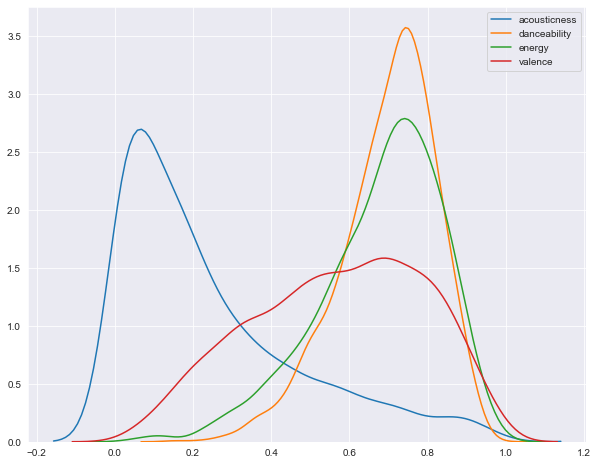

In [22]:
# Probamos con unas algunas Features que tienen una escala correcta y vemos que pasa cuando incluímos alguna de las anteriores.
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

#Features entre 0 y 1
sns.kdeplot(data_features_final['acousticness'], ax=ax1) # Feature de control
sns.kdeplot(data_features_final['danceability'], ax=ax1) # Feature de control
sns.kdeplot(data_features_final['energy'], ax=ax1) # Feature de control
sns.kdeplot(data_features_final['valence'], ax=ax1) # Feature de control

#Features para normalizar
# sns.kdeplot(data_features_final['length'], ax=ax1)
# sns.kdeplot(data_features_final['popularity'], ax=ax1)
# sns.kdeplot(data_features_final['loudness'], ax=ax1)
# sns.kdeplot(data_features_final['tempo'], ax=ax1)
# sns.kdeplot(data_features_final['instrumentalness'], ax=ax1)

Reviso también la feature instrumentalness, que es un poco extraña. Según la documentación de Spotify este feature se interpreta como: valores entre 0.5 y 1 es una instrumental y entre 0 y 0,5 no es isntrumental, pero cuidado porque no sigue una distribución normal.

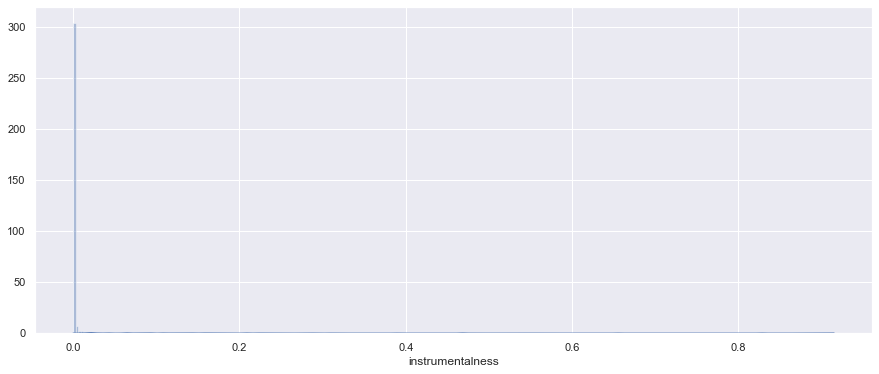

Nº canciones mayores que 0.5 en instrumentalness:  8
Nº canciones mayores que son igual o menores que 0.1:  1580
Total canciones:  1617


In [23]:
# En esta gráfica se ve que muchísimos de los valores son 0 y es lógico porque en los top200 esperamos ver pocas canciones instrumentales
sns.set(rc={'figure.figsize':(15,6)})
sns.distplot(data_features_final['instrumentalness'], bins=300)
plt.show()

# Si vamos más a la concreto, podemos ver cuantos valores son 0 y cuántos sobrepasan el 0.5, es decir, son instrumentales
print("Nº canciones mayores que 0.5 en instrumentalness: ", data_features_final[data_features_final['instrumentalness'] > 0.5].count()[0])
print("Nº canciones mayores que son igual o menores que 0.1: ", data_features_final[data_features_final['instrumentalness'] <= 0.1].count()[0])
print("Total canciones: ", data_features_final.shape[0])

Tras probar diferentes formas de normalizar, **me inclino por hacerlo con máximos y mínimos** con la función de sklearn, pero la feature instrumentalness decido dejarla así, porque parece más dicotómica.

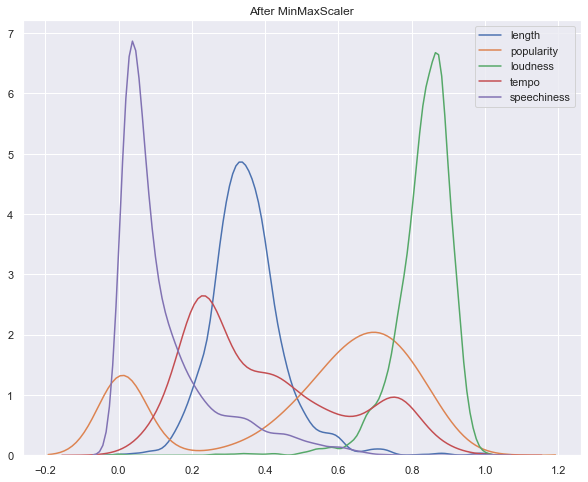

In [24]:
import seaborn as sns
from sklearn import preprocessing

# Definir tabla con features seleccionadas y ver cómo quedan
features = data_features_final[['length', 'popularity','loudness','tempo','speechiness']]

# Cogemos la lista de features del dataframe
col_names = list(features.columns)

# Hacemos el proceso de preprocesado
maxmin_scaler = preprocessing.MinMaxScaler()
features_maxmin = maxmin_scaler.fit_transform(features)

# Lo metemos en un dataframe
features_maxmin_final = pd.DataFrame(features_maxmin, columns=col_names)

# Representamos para ver si ha funcionado.
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(features_maxmin_final['length'], ax=ax1)
sns.kdeplot(features_maxmin_final['popularity'], ax=ax1)
sns.kdeplot(features_maxmin_final['loudness'], ax=ax1)
sns.kdeplot(features_maxmin_final['tempo'], ax=ax1)
sns.kdeplot(features_maxmin_final['speechiness'], ax=ax1)

Para modificarlo sobre el dataframe directamente he encontrado una función lambda mucho más eficiente

In [25]:
features_to_normalize = ['length', 'popularity', 'loudness', 'tempo', 'speechiness']

data_features_final[features_to_normalize] = data_features_final[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
data_features_final.head(2)

,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id,release_date_year
0,Musas (Un Homenaje al Folclore Latinoamericano...,2017-05-05,0.437732,0.663265,0.782,0.664,0.460,0.000003,0.176,0.658831,0.118413,0.792,0.718984,4,6p3yxt0uJJshAS3CT0znQg,2017
1,Traicionera,2016-06-24,0.395506,0.010204,0.142,0.776,0.669,0.000000,0.219,0.857157,0.058772,0.661,0.190859,4,5J1c3M4EldCfNxXwrwt8mT,2016


**Para terminar juntamos Dataframe inicial con el de Features normalizadas**

In [26]:
data_features = pd.merge(data_top200_merged, data_features_final, on=['spotify_id'], how='inner')
print(data_features.shape)
data_features.sample(3)

(48800, 23)


,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year
10918,55,DOSIS,Dvicio,81232,2020-04-07,0AJKRuWjsVn6B43gm5HfjV,2020,4145714,Impulso,2020-03-19,0.371717,0.663265,0.150,0.748,0.775,0.0,0.1580,0.819895,0.037638,0.776,0.304000,4,2020
30147,107,No Hay Nadie Más,Sebastian Yatra,36739,2018-04-21,6wos8Ds5FKMe33GjBHRake,2018,2366663,No Hay Nadie Más,2018-01-26,0.316561,0.000000,0.845,0.684,0.378,0.0,0.0969,0.719041,0.021569,0.771,0.284417,4,2018
10143,199,Desde cero (con Melendi),Beret,33674,2020-03-23,3RfmZepJErldBC4JXut6L9,2020,166969,Prisma,2019-10-25,0.327970,0.622449,0.249,0.495,0.461,0.0,0.1260,0.751280,0.038217,0.250,0.337961,5,2019


### Curiosidad ¿Cuántas artistas únicos y sus streams tenemos?

Echamos un vistazo a ver ¿Cuántos artistas únicos hay realmente? Y obtenemos una lista de los artistas que más veces han estado en el top200: en dicho periodo que seleccionamos inicialmente y en los cuatro años analizados. Vaya, parece que el "conejo malo" está a tope...

In [27]:
artist_unique = data_features.groupby('Artist')['spotify_id'].nunique()
print(artist_unique.shape)
artist_unique.sort_values(ascending=False).head(20)

(468,)


Artist
Bad Bunny          44
J Balvin           31
Ozuna              28
C. Tangana         25
Ed Sheeran         22
Dua Lipa           21
Beret              20
Aitana             20
The Weeknd         20
Drake              19
Billie Eilish      19
Leiva              19
Sebastian Yatra    19
Avicii             17
Rels B             17
Morat              16
Maluma             15
KAROL G            14
Dalex              13
Alejandro Sanz     13
Name: spotify_id, dtype: int64

Si hacemos lo mismo con los StreamsTotal, vemos que la lista no es igual, pero Bad Bunny se mantiene y con muchos más streams. Recordamos que esto es para los años 2017-2020, juntos.

In [29]:
artist_streams = data_features.groupby('Artist')['Streamstotal'].sum()
print(artist_streams.shape)
artist_streams.sort_values(ascending=False).head(20)

(468,)


Artist
Bad Bunny           9700441269
J Balvin            6934872473
Ed Sheeran          6154283789
Daddy Yankee        5587907352
Ozuna               4757602534
Luis Fonsi          4177813491
Anuel AA            3896677449
Nicky Jam           3626907663
ROSALÍA             3442201554
Maluma              3083713880
Danny Ocean         2942923399
Myke Towers         2739822328
Reik                2659998345
Rauw Alejandro      2590432117
Sebastian Yatra     2567436006
Don Patricio        2376027505
Morat               2317973373
Lunay               2274981448
Beret               2146978341
Enrique Iglesias    2132734096
Name: Streamstotal, dtype: int64

# Extracción del género de las canciones

Para identificar cada canción con un género se plantearon incialmente dos formas:
1. Crear un modelo de clasificación, que por sus features, clasificara todas las canciones en grupos que luego identifciariamos. En internet encontré mucha documentación y trabajos que hacen esto, y en la mayoría no subían de un score de 70-80, por lo que era difícil una buena clasificación por las features. Aún así, hice algunas pruebas y no conseguí buenos resultados, como esperaba. Hay que tener en cuenata además que nos géneros es un constructo humano y que hay muchos actualmente.
2. De la API de Spotify sacar directamente los géneros del artistas y con un análisis previo de los datos, crear grupos generalizables teniendo en cuenta los nombres de los géneros. Por ejemplo, si una canción estaba clasificada como "trap espanol", se le agrupaba en el género hiphop, por considerar yo mismo que entra dentro de este grupo por su parecido. Evidemente esto supuso también escuchar muchos géneros que ni conocía y el nombre no daba pistas para clasificarlos.

**Elegí el segundo camino.**

El problema del segundo camino era que el género no se puede sacar por la información de las canciones con la API de Spotify, el género es una etiqueta/feature que solo está asignada a los artistas. Por lo tanto no me quedaba otra que extraer esta información de los artistas y luego unirla al dataframe de las canciones.

Elaboramos el script para extraer los géneros de cada artista.

In [30]:
# IMPORTANTE!!! Esta celda tarda en ejecutarse alrededor de 1 minuto

# Selecciono la lista final a extraer completa
list_toextract_artist = test_list_artist

# Función para extraerlos, en lotes de 50 porque es el máximo que te deja la API de Spotify
def extract_artist(artist_list):
    count_artist= 0
    data = ['test11111111', 'tes111111', 'test111111', 0, 0]
    df_final = pd.DataFrame([data], columns=["id", "name", "genres", 'followers', 'popularity'])
    
    API_LIMIT = 50
    search_list = []

    for artist in artist_list:
        count_artist += 1
        search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT)
        
        count_oneartist= 0 # Se añade un contador par quedarnos sólo con la primera búsqueda que he comprobado que siempre es la buena.
        for t in search_results['artists']['items']:
            count_oneartist += 1
            if count_oneartist ==2:
                break
            else:
                search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']]]
        
        df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
        
        df_final = df_final.append(df_search) # El problema de esto es que crea duplicados pero no nos afecta en lo que necesitamos
    print('Artist count:', count_artist)  
    return df_final

# Extracción de los datos
Time1 = datetime.now()
df_genres = extract_artist(list_toextract_artist)
Time2 = datetime.now()
print("Tiempo ejecución:", Time2 -Time1)

print(df_genres.shape)
df_genres.head(6)


Artist count: 468
Tiempo ejecución: 0:00:44.236422
(109418, 5)


,id,name,genres,followers,popularity
0,test11111111,tes111111,test111111,0,0
0,2hahtdJusGYC77DKod4qfB,Miki Núñez,"[eurovision, latin talent show, latin viral po...",93754,61
0,2hahtdJusGYC77DKod4qfB,Miki Núñez,"[eurovision, latin talent show, latin viral po...",93754,61
1,5vBSrE1xujD2FXYRarbAXc,Years & Years,"[dance pop, edm, gauze pop, pop, tropical house]",1454458,73
0,2hahtdJusGYC77DKod4qfB,Miki Núñez,"[eurovision, latin talent show, latin viral po...",93754,61
1,5vBSrE1xujD2FXYRarbAXc,Years & Years,"[dance pop, edm, gauze pop, pop, tropical house]",1454458,73


En un primer vistazo vemos que no nos da un género único, sino una lista de géneros por artistas. Limpiamos los datos y los transformamos para un análisis más sencillo posteriormente.

In [31]:
# IMPORTANTE!! Tarda en ejecutarse dependiendo del número de artistas, menos de 1 minuto.

# Creamos una copia de la columna genres para mantenerla y la trasnformo a strings
df_genres['genres_together'] = df_genres['genres'].copy()
df_genres['genres_together'] = [','.join(i) if isinstance(i, list) else i for i in df_genres['genres_together']]

# Como la columna genres es una lista con los diferentes géneros, he preferido separarlo en columnas y mantener ciertas columnas sólo
df_genres2 = pd.concat([df_genres['genres'].apply(pd.Series), df_genres[['genres_together',
                                                                         'id',
                                                                         "name",
                                                                         'followers',
                                                                         'popularity']]], axis = 1)
# Quitamos los artistas duplicados
df_genres3 = df_genres2.drop_duplicates(df_genres2.columns[~df_genres2.columns.isin(['id'])])

#Renombramos columnas por nuestra salud de luego entenderlo mejor
df_genres4 = df_genres3.rename(columns={0:'genre1',
                   1:'genre2',
                   2:'genre3',
                   3:'genre4',
                   4:'genre5',
                   5:'genre6',
                   6:'genre7',
                   7:'genre8',
                   8:'genre9',
                   9:'genre10',
                   'genres_together':'genres_together',
                   'id':'artist_id',
                   'name':'Artist',
                   'followers':'artist_followers',
                   'popularity':'artist_popularity'}).copy()
print(df_genres4.shape)
print(len(df_genres4['Artist'].unique()))
df_genres4.head(10)

(463, 15)
463


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,Artist,artist_followers,artist_popularity
0,test111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test111111,test11111111,tes111111,0,0
0,eurovision,latin talent show,latin viral pop,musica catalana,reggae catala,spanish pop,NaN,NaN,NaN,NaN,"eurovision,latin talent show,latin viral pop,m...",2hahtdJusGYC77DKod4qfB,Miki Núñez,93754,61
1,dance pop,edm,gauze pop,pop,tropical house,NaN,NaN,NaN,NaN,NaN,"dance pop,edm,gauze pop,pop,tropical house",5vBSrE1xujD2FXYRarbAXc,Years & Years,1454458,73
2,latin talent show,latin viral pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin talent show,latin viral pop",55e3PARQefUOrTPIDTbURW,Roi Méndez,84298,48
3,dancehall,soca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"dancehall,soca",5sK8BsvyDl4TFA6KaBf8or,Charly Black,219196,64
4,latin,trap venezolano,venezuelan hip hop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,trap venezolano,venezuelan hip hop",1aWJsBQa67l72j1VT3D6Ow,Micro TDH,589016,76
5,latin,latin arena pop,latin pop,spanish pop,spanish pop rock,tropical,NaN,NaN,NaN,NaN,"latin,latin arena pop,latin pop,spanish pop,sp...",5gOJTI4TusSENizxhcG7jB,David Bisbal,2784811,76
6,dance pop,edm,pop,post-teen pop,tropical house,uk dance,uk funky,NaN,NaN,NaN,"dance pop,edm,pop,post-teen pop,tropical house...",6MDME20pz9RveH9rEXvrOM,Clean Bandit,3971246,81
7,dance pop,pop,post-teen pop,tropical house,uk pop,NaN,NaN,NaN,NaN,NaN,"dance pop,pop,post-teen pop,tropical house,uk pop",1zNqDE7qDGCsyzJwohVaoX,Anne-Marie,6398599,83
8,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,spanish pop,2rGri7YZ2eiCS58zgvmlQb,Sinsinati,49940,65


Inspeccionamos un poco los datos

In [32]:
# Hacemos una prueba con un artista
df_genres4[df_genres4['Artist'] == 'Bad Bunny']

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,Artist,artist_followers,artist_popularity
36,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",4q3ewBCX7sLwd24euuV69X,Bad Bunny,24618295,97


Vemos cuántos géneros hay en cada columna de género

In [33]:
number_genres = df_genres4.genre1.value_counts()
number_genres.head(15)

latin                71
dance pop            64
flamenco urbano      18
cantautor            17
colombian pop        15
spanish pop          13
pop                  13
latin pop            10
rap espanol           8
big room              8
latin arena pop       7
argentine hip hop     6
latin viral pop       5
trap espanol          5
cubaton               5
Name: genre1, dtype: int64

Compruebo que en determinadas canciones, hay géneros que no siempre entán en la misma columna, pueden estar en diferentes columnas (unos en la primera, otros en la segunda...), esto puedo ser un problema que intentaremos evitar en las agrupaciones y que veremos en la Notebook de análisis.

In [34]:
df_genres4[df_genres4['genre2'] == 'spanish pop']

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,Artist,artist_followers,artist_popularity
35,latin arena pop,spanish pop,spanish pop rock,spanish rock,NaN,NaN,NaN,NaN,NaN,NaN,"latin arena pop,spanish pop,spanish pop rock,s...",0QE9iXPzgSaBq34OqIZ4n2,Despistaos,176683,62
125,latin arena pop,spanish pop,spanish rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin arena pop,spanish pop,spanish rock",4cA5JN7tiNZ8afYeuSQj5h,David Otero,117474,63
129,latin pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin pop,spanish pop",6k8mwkKJKKjBILo7ypBspl,Ana Mena,266243,75
151,flamenco urbano,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"flamenco urbano,spanish pop",1tMWkquIkQtVD6vaZlDbSQ,Chema Rivas,9054,66
154,latin arena pop,spanish pop,spanish rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin arena pop,spanish pop,spanish rock",5Hsv8dUHHOdnn72q4XIVz7,Leiva,443269,69
201,latin pop,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin pop,spanish pop,spanish pop rock",3AIPhNgeF9S1Kyg9Yy3UQW,Dani Martín,529624,68
259,flamenco urbano,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"flamenco urbano,spanish pop,spanish pop rock",6flBUmmOMLNhD4EJhGwgpG,Camela,242243,61
277,flamenco urbano,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"flamenco urbano,spanish pop",1dbp04JzZ81JXlMGupCnJ8,Antonio José,383531,64
280,rumba,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"rumba,spanish pop",5ZqnEfVdEGmoPxtELhN7ai,Estopa,1124840,72
328,cantautor,spanish pop,spanish pop rock,spanish rock,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,spanish pop,spanish pop rock,spanish...",6mfK6Q2tzLMEchAr0e9Uzu,Pereza,347423,62


Hago un poco más de limpieza

In [35]:
# Decido aprovechar y normalizar también el artist popularity por si lo uso posteriormente
features_to_normalize2 = ['artist_popularity']
df_genres4[features_to_normalize2] = df_genres4[features_to_normalize2].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

# Reseteo index y quito fila y columnas sobrantes
df_genres5 = df_genres4.reset_index()
df_genres6 = df_genres5.drop(['index'], axis=1)
df_genres7 = df_genres6.drop(df_genres6.index[0])

# Lo vemos
print(df_genres7.shape)
df_genres7.head(4)


(462, 15)


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,Artist,artist_followers,artist_popularity
1,eurovision,latin talent show,latin viral pop,musica catalana,reggae catala,spanish pop,NaN,NaN,NaN,NaN,"eurovision,latin talent show,latin viral pop,m...",2hahtdJusGYC77DKod4qfB,Miki Núñez,93754,0.616162
2,dance pop,edm,gauze pop,pop,tropical house,NaN,NaN,NaN,NaN,NaN,"dance pop,edm,gauze pop,pop,tropical house",5vBSrE1xujD2FXYRarbAXc,Years & Years,1454458,0.737374
3,latin talent show,latin viral pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin talent show,latin viral pop",55e3PARQefUOrTPIDTbURW,Roi Méndez,84298,0.484848
4,dancehall,soca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"dancehall,soca",5sK8BsvyDl4TFA6KaBf8or,Charly Black,219196,0.646465


# Final: Unimos Dataframe Previo + Dataframe Genres y exportamos

In [36]:
data_glo = pd.merge(data_features, df_genres7, on=['Artist'], how='inner')

# (Ojo!!! en este paso IMPORTANTE poner de qué periodo es)

###### Exportar a CSV de Coronaperiod???
data_glo.to_csv("data_global_coronaperiod.csv", sep = ',')
data_glo['Period'] = 'Coronaperiod'

###### Exportar a CSV de NormalPeriod??? SÓLO USAR EN EXPORTACIÓN INICIAL
'''data_glo['Period'] = 'NormalPeriod'
data_glo.to_csv("data_global_normalperiod.csv", sep = ',')'''

'data_glo[\'Period\'] = \'NormalPeriod\'\ndata_glo.to_csv("data_global_normalperiod.csv", sep = \',\')'

# Primer vistazo a los datos


## Correlaciones

Analizamos las correlaciones y parece que tienen lógica- Oor ejemplo las features Energy y Loudness tienen una correlación alta: generalmente canciones muy enérgicas suelen ser también ruidosas.

In [42]:
#Para ver si existen variables con corelación entre ellas.
corr_metrics = data_glo.corr()
corr_metrics.style.background_gradient()

,Position,Streams,year,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,artist_followers,artist_popularity
Position,1.000000,-0.738909,0.001764,-0.584155,-0.023169,-0.022909,0.060875,-0.160260,-0.096329,0.059918,0.008091,-0.146221,0.006062,-0.124260,0.043344,-0.028020,-0.133635,-0.060115,-0.168454
Streams,-0.738909,1.000000,0.205545,0.740358,-0.012967,0.111528,-0.010052,0.160656,0.062214,-0.035225,-0.015519,0.124270,0.056268,0.142200,-0.022700,0.044597,0.173396,0.014108,0.141284
year,0.001764,0.205545,1.000000,0.183442,-0.143451,0.478334,0.083461,0.116443,-0.060224,0.070195,-0.020170,0.038795,0.087780,0.059386,0.058484,0.018832,0.325571,-0.151987,0.001653
Streamstotal,-0.584155,0.740358,0.183442,1.000000,0.027134,0.140308,0.008216,0.169577,0.099427,-0.045512,-0.030463,0.162843,0.019169,0.155238,-0.066703,0.030457,0.106369,0.065571,0.129433
length,-0.023169,-0.012967,-0.143451,0.027134,1.000000,-0.022743,0.015105,-0.070871,0.029971,-0.042445,-0.021412,0.031092,-0.011184,-0.067742,0.032369,-0.026471,-0.171613,0.056751,0.040385
popularity,-0.022909,0.111528,0.478334,0.140308,-0.022743,1.000000,0.044879,0.079501,-0.072188,0.046071,-0.069462,0.023323,0.017588,-0.006597,-0.028411,0.001766,0.118547,0.078388,0.120480
acousticness,0.060875,-0.010052,0.083461,0.008216,0.015105,0.044879,1.000000,-0.130134,-0.490870,0.008031,-0.071473,-0.357389,0.104560,-0.165280,-0.013567,-0.118731,0.045097,0.061436,0.020648
danceability,-0.160260,0.160656,0.116443,0.169577,-0.070871,0.079501,-0.130134,1.000000,0.091994,0.010500,0.005476,0.148237,0.102173,0.356954,-0.205646,0.125834,0.140976,-0.002401,0.061663
energy,-0.096329,0.062214,-0.060224,0.099427,0.029971,-0.072188,-0.490870,0.091994,1.000000,-0.012982,0.094246,0.729552,-0.072390,0.432812,0.016530,0.153490,0.027365,-0.200865,-0.130486
instrumentalness,0.059918,-0.035225,0.070195,-0.045512,-0.042445,0.046071,0.008031,0.010500,-0.012982,1.000000,0.036070,-0.083613,0.014571,-0.063680,0.023804,-0.013661,-0.045601,0.050317,0.018194


In [49]:
#ver correlación concreta entre loudness y energy
data_glo2 = data_glo.loc[:, ['loudness', 'energy']]
corr_metrics2 = data_glo2.corr()
corr_metrics2.style.background_gradient()

,loudness,energy
loudness,1.000000,0.729552
energy,0.729552,1.000000


## Comparar FEATURES de cada año (sin ponderar)

Ploteamos en gráfico para ver la cantidad de canciones con los valores de determinadas features

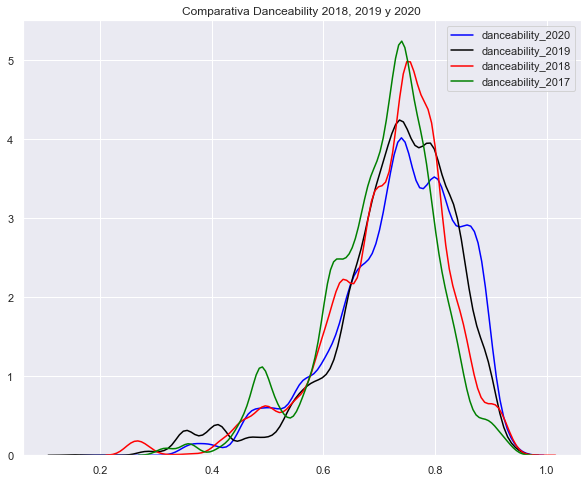

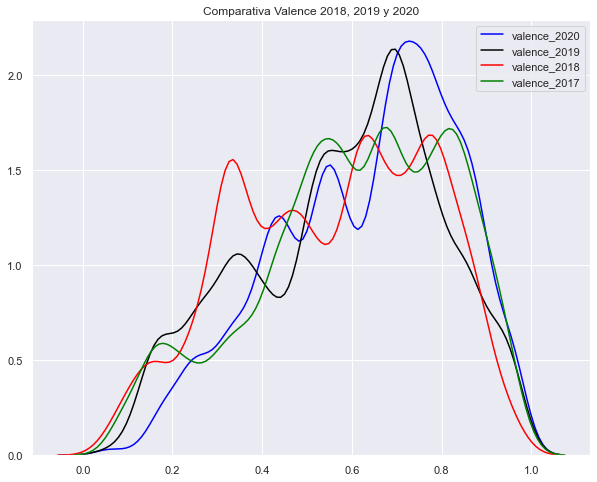

In [38]:
data_glo_2020 = data_glo[data_glo['year'] == 2020]
data_glo_2019 = data_glo[data_glo['year'] == 2019]
data_glo_2018 = data_glo[data_glo['year'] == 2018]
data_glo_2017 = data_glo[data_glo['year'] == 2017]

feature_list = ['length','popularity', 'acousticness', 'danceability','energy', 'instrumentalness', 'liveness',
                'loudness', 'speechiness', 'valence', 'tempo']

features_2020 = data_glo_2020[feature_list]
features_2019 = data_glo_2019[feature_list]
features_2018 = data_glo_2018[feature_list]
features_2017 = data_glo_2017[feature_list]

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparativa Danceability 2018, 2019 y 2020')
sns.kdeplot(features_2020['danceability'], ax=ax1, color = 'blue', Label='danceability_2020')
sns.kdeplot(features_2019['danceability'], ax=ax1, color = 'black', Label='danceability_2019')
sns.kdeplot(features_2018['danceability'], ax=ax1, color = 'red', Label='danceability_2018')
sns.kdeplot(features_2017['danceability'], ax=ax1, color = 'green', Label='danceability_2017')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparativa Valence 2018, 2019 y 2020')
sns.kdeplot(features_2020['valence'], ax=ax1, color = 'blue', Label='valence_2020')
sns.kdeplot(features_2019['valence'], ax=ax1, color = 'black', Label='valence_2019')
sns.kdeplot(features_2018['valence'], ax=ax1, color = 'red', Label='valence_2018')
sns.kdeplot(features_2017['valence'], ax=ax1, color = 'green', Label='valence_2017')

Hacemos lo mismo pero viendo las medias (ojo! sin ponderar, eso lo hacemos en el análisis mejor)

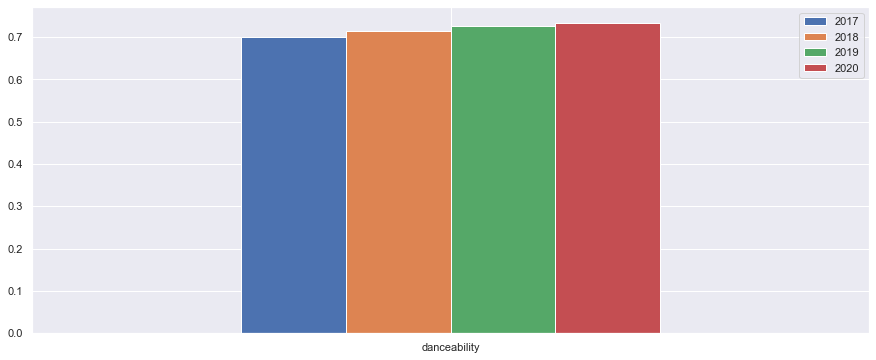

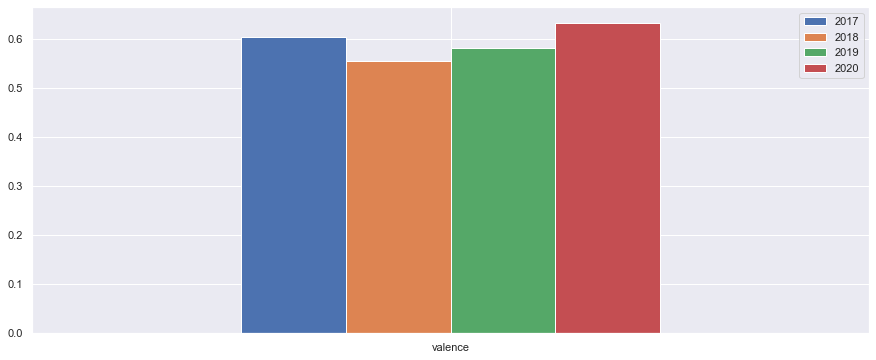

In [39]:
data_mean_dance_2020 = features_2020['danceability'].mean()
data_mean_dance_2019 = features_2019['danceability'].mean()
data_mean_dance_2018 = features_2018['danceability'].mean()
data_mean_dance_2017 = features_2017['danceability'].mean()
index_dance = ['danceability']

data_mean_valen_2020 = features_2020['valence'].mean()
data_mean_valen_2019 = features_2019['valence'].mean()
data_mean_valen_2018 = features_2018['valence'].mean()
data_mean_valen_2017 = features_2017['valence'].mean()
index_valen = ['valence']

df_dance = pd.DataFrame({'2017': data_mean_dance_2017,'2018': data_mean_dance_2018,'2019': data_mean_dance_2019, '2020': data_mean_dance_2020}, index=index_dance)
ax = df_dance.plot.bar(rot=0)

df_valen = pd.DataFrame({'2017': data_mean_valen_2017, '2018': data_mean_valen_2018,'2019': data_mean_valen_2019, '2020': data_mean_valen_2020}, index=index_valen)
ax = df_valen.plot.bar(rot=0)

Hacemos lo mismo pero probando a quitar artistas duplicados, es decir para que no se repitan muchos unos mismos artistas por canciones, auqnue vemos que es muy parecido

(48066, 38)
(1420, 38)


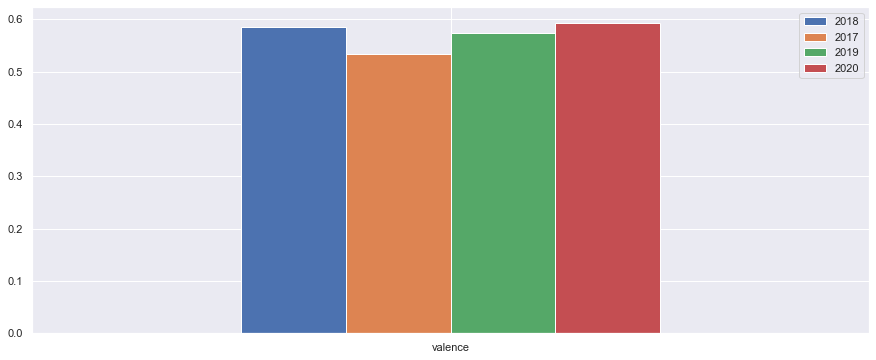

In [40]:
# 
data_glo2 = data_glo.drop_duplicates(subset=['Track Name'])
print(data_glo.shape)
print(data_glo2.shape)

data_glo2_2020 = data_glo2[data_glo2['year'] == 2020]
data_glo2_2019 = data_glo2[data_glo2['year'] == 2019]
data_glo2_2018 = data_glo2[data_glo2['year'] == 2018]
data_glo2_2017 = data_glo2[data_glo2['year'] == 2017]

feature_list2 = ['length','popularity', 'acousticness', 'danceability','energy', 'instrumentalness', 'liveness',
                'loudness', 'speechiness', 'valence', 'tempo']

features2_2020 = data_glo2_2020[feature_list2]
features2_2019 = data_glo2_2019[feature_list2]
features2_2018 = data_glo2_2018[feature_list2]
features2_2017 = data_glo2_2017[feature_list2]

data_mean2_2020 = features2_2020['valence'].mean()
data_mean2_2019 = features2_2019['valence'].mean()
data_mean2_2018 = features2_2018['valence'].mean()
data_mean2_2017 = features2_2017['valence'].mean()
index = ['valence']

df = pd.DataFrame({'2018': data_mean2_2017, '2017': data_mean2_2018, '2019': data_mean2_2019, '2020': data_mean2_2020}, index=index)
ax = df.plot.bar(rot=0)


## Después de la extracción de los datos de el Periodo Coronavirus y el Normal, pasamos al análisis de los datos en los otros Notebooks...en orden:
- [Data_Analysis1_Features.ipynb](Data_Analysis1_Features.ipynb)


**De este Notebook extraemos los siguientes CSVs que usaremos posteriormente:**
- data_global_coronaperiod.csv
- data_global_normalperiod.csv
